First, we import the required libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')


sample_data = pd.read_csv('dataset - Copy.csv')

print('Dataset Shape before drop_duplicate : ', sample_data.shape)
sample_data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Dataset Shape after drop_duplicate: ', sample_data.shape)

Dataset Shape before drop_duplicate :  (100000, 23)
Dataset Shape after drop_duplicate:  (100000, 23)


In [ ]:
pip install pyspark

In [ ]:
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import *

In [ ]:
import pyspark.sql.functions as F


In [ ]:
spark = SparkSession.builder.appName("DataFrame").getOrCreate()

In [ ]:
df = spark.read.csv('/content/dataset - Copy.csv', inferSchema=True, header=True)


## Make different column with Date column

In [ ]:
dataset=df.withColumn("Day", F.split(df.Date, " ")[0])
dataset=dataset.withColumn("Day", F.to_date(dataset.Day, "MM/dd/yyyy"))
dataset=dataset.withColumn("Month", F.month(dataset.Day))
dataset=dataset.withColumn("Week", F.weekofyear(dataset.Day))
#dataset=dataset.drop('Day')
#dataset=dataset.drop('Date')
dataset.take(5)

[Row(_c0=2015825, ID=2508182, Case Number='HH781001', Date='11/15/2002 12:30:00 PM', Block='003XX N ASHLAND AVE', IUCR='0810', Primary Type='THEFT', Description='OVER $500', Location Description='STREET', Arrest=False, Domestic=False, Beat=1333, District=12.0, Ward=27.0, Community Area=28.0, FBI Code='06', X Coordinate=1165667.0, Y Coordinate=1902638.0, Year=2002, Updated On='02/28/2018 03:56:25 PM', Latitude=41.888429628, Longitude=-87.667063831, Location='(41.888429628, -87.667063831)', Day=datetime.date(2002, 11, 15), Month=11, Week=46),
 Row(_c0=2110300, ID=2687361, Case Number='HJ308830', Date='04/18/2003 06:10:00 PM', Block='016XX W 18TH ST', IUCR='0486', Primary Type='BATTERY', Description='DOMESTIC BATTERY SIMPLE', Location Description='SIDEWALK', Arrest=False, Domestic=True, Beat=1222, District=12.0, Ward=25.0, Community Area=31.0, FBI Code='08B', X Coordinate=1165650.0, Y Coordinate=1891466.0, Year=2003, Updated On='02/10/2018 03:50:01 PM', Latitude=41.857773091, Longitude=-8

In [ ]:
dataset

DataFrame[_c0: int, ID: int, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: double, Ward: double, Community Area: double, FBI Code: string, X Coordinate: double, Y Coordinate: double, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string, Day: date, Month: int, Week: int]

In [ ]:
data = dataset.toPandas()

In [ ]:
data.head(1)

,_c0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month,Week
0,2015825,2508182,HH781001,11/15/2002 12:30:00 PM,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,...,1165667.0,1902638.0,2002,02/28/2018 03:56:25 PM,41.88843,-87.667064,"(41.888429628, -87.667063831)",2002-11-15,11,46


Form a other section for similar types of crimes

# primary type

In [ ]:
data['Primary Type'] = ['THEFT' if x =='Theft' else x for x in data['Primary Type']]

In [ ]:
data['Primary Type'] = ['THEFT' if x =='Theft' else x for x in data['Primary Type']]

In [ ]:
data['Primary Type'] = ['THEFT' if x =='BURGLARY' else x for x in data['Primary Type']]

In [ ]:
data['Primary Type'] = ['SEX OFFENSE' if x =='CRIM SEXUAL ASSAULT' else x for x in data['Primary Type']]

In [ ]:
data['Primary Type'] = ['SEX OFFENSE' if x =='CRIMINAL SEXUAL ASSAULT' else x for x in data['Primary Type']]

In [ ]:
data['Primary Type'] = ['SEX OFFENSE' if x =='SEX NARCOTICS' else x for x in data['Primary Type']]

In [ ]:
data['Primary Type'] = ['SEX OFFENSE' if x =='CRIM SEXUAL ASSAULT' else x for x in data['Primary Type']]

In [ ]:
data.value_counts(['Primary Type'])

Primary Type                     
THEFT                                26630
BATTERY                              18417
CRIMINAL DAMAGE                      11573
NARCOTICS                             9845
ASSAULT                               6448
OTHER OFFENSE                         6172
MOTOR VEHICLE THEFT                   4460
DECEPTIVE PRACTICE                    4322
ROBBERY                               3784
CRIMINAL TRESPASS                     2860
WEAPONS VIOLATION                     1245
PROSTITUTION                           974
SEX OFFENSE                            772
PUBLIC PEACE VIOLATION                 721
OFFENSE INVOLVING CHILDREN             651
INTERFERENCE WITH PUBLIC OFFICER       253
GAMBLING                               183
ARSON                                  182
LIQUOR LAW VIOLATION                   164
HOMICIDE                               147
KIDNAPPING                              79
INTIMIDATION                            55
STALKING            

In [ ]:
data.dropna(how='any', axis=0, inplace=True) 

In [ ]:
data.isnull().sum()

# Data with different column

In [ ]:
crimes=data.copy()

In [ ]:
crimes.drop(['_c0','ID','Case Number','Updated On','Year', 'Location','X Coordinate','Y Coordinate'], inplace=True, axis=1)

How many records we have and how many features for each record?

In [ ]:
crimes.value_counts(['District'])

District
8.0         6869
11.0        6409
6.0         5945
7.0         5919
4.0         5708
25.0        5669
3.0         5054
9.0         5030
12.0        4918
2.0         4562
18.0        4420
19.0        4412
15.0        4400
5.0         4391
10.0        4356
1.0         3939
14.0        3780
16.0        3314
22.0        3279
24.0        3073
17.0        2845
20.0        1706
31.0           2
dtype: int64

In [ ]:
Block_direction=[]    # block column contain 4 differnt sides block of the chicago city 
for i in crimes['Block']:
  Block_direction.append(i[6])


In [ ]:
crimes['Block_direction']= Block_direction

In [ ]:
#crimes=crimes.drop(['Block'],axis=1)

In [ ]:
crimes.head(10)

Let's make sure we are dealing with the right type of columns

In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  100000 non-null  object 
 1   Block                 100000 non-null  object 
 2   IUCR                  100000 non-null  object 
 3   Primary Type          100000 non-null  object 
 4   Description           100000 non-null  object 
 5   Location Description  100000 non-null  object 
 6   Arrest                100000 non-null  bool   
 7   Domestic              100000 non-null  bool   
 8   Beat                  100000 non-null  int32  
 9   District              100000 non-null  float64
 10  Ward                  100000 non-null  float64
 11  Community Area        100000 non-null  float64
 12  FBI Code              100000 non-null  object 
 13  Latitude              100000 non-null  float64
 14  Longitude             100000 non-null  float64
 15  D

#Exploration and Visualization

In [141]:
df = data.copy()

#removing the null values
df = df.dropna()

#removing the unnecessary data for the notebook
df = df.drop(columns = ['Block', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year','FBI Code', 'Beat', 'Ward','Community Area', 'District'], axis = 1)
df.head(3)

,_c0,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude,Location,Day,Month,Week
0,2015825,2508182,2002-11-15 12:30:00,THEFT,OVER $500,STREET,False,False,41.888430,-87.667064,"(41.888429628, -87.667063831)",2002-11-15,11,46
1,2110300,2687361,2003-04-18 18:10:00,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,41.857773,-87.667445,"(41.857773091, -87.667444544)",2003-04-18,4,16
2,381828,10755691,2016-11-16 21:50:00,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,41.869447,-87.744861,"(41.869447309, -87.744861466)",2016-11-16,11,46


In [142]:
%%time
df.Date = pd.to_datetime(df.Date, format = '%m/%d/%Y %I:%M:%S %p')

CPU times: user 15.8 ms, sys: 1.87 ms, total: 17.7 ms
Wall time: 17.4 ms


In [143]:
df.head(1)


,_c0,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude,Location,Day,Month,Week
0,2015825,2508182,2002-11-15 12:30:00,THEFT,OVER $500,STREET,False,False,41.88843,-87.667064,"(41.888429628, -87.667063831)",2002-11-15,11,46


In [144]:
%%time
#assigning date as index of dataset as we will need it in later section for drwing beautiful heatmaps
df.index = df.Date

CPU times: user 0 ns, sys: 610 µs, total: 610 µs
Wall time: 624 µs


#Extracting description and location_description which are less prone to crime¶


In [145]:
list_of_description = list(df['Description'].value_counts().index[20:])
list_of_location_description = list(df['Location Description'].value_counts().index[20:])

In [146]:
df.loc[df['Description'].isin(list_of_description), df.columns == 'Description'] = 'OTHER'
df.loc[df['Location Description'].isin(list_of_location_description), df.columns == 'Location Description'] = 'OTHER'

In [147]:
df['Description'] = pd.Categorical(df['Description'])
df['Location Description'] = pd.Categorical(df['Location Description'])

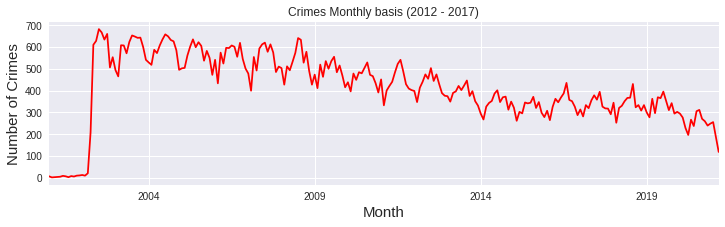

In [148]:
plt.figure(figsize = (12,3))
df['Date'].resample('M').size().plot(legend = False, color = 'red')
plt.title('Crimes Monthly basis (2001 - 2021)')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Number of Crimes', fontsize = 15)
plt.show()

### Drawing plots of crime after sampling them on daily basis¶


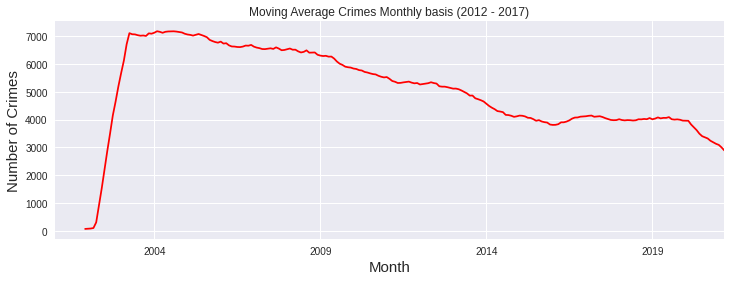

In [149]:
plt.figure(figsize = (12, 4))
df['Date'].resample('M').size().rolling(12).sum().plot(legend = False, color = 'red')
plt.title('Moving Average Crimes Monthly basis (2012 - 2017)')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Number of Crimes', fontsize = 15)
plt.show()

### Drawing moving average plot of crime after sampling on monthly basis¶


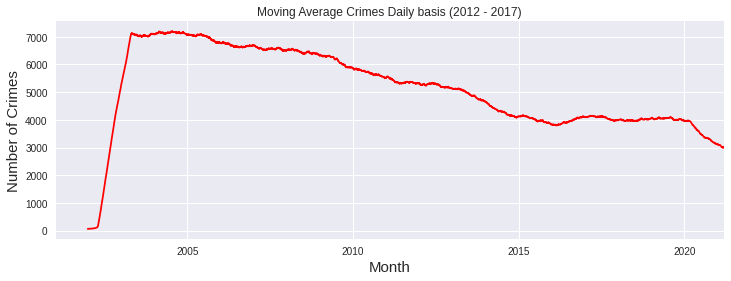

In [150]:
plt.figure(figsize = (12, 4))
df['Date'].resample('D').size().rolling(365).sum().plot(legend = False, color = 'red')
plt.title('Moving Average Crimes Daily basis (2012 - 2017)')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Number of Crimes', fontsize = 15)
plt.show()

### Creating a table which consists of types of crimes as columns

In [151]:
crimes_count_date = df.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df.index.date, fill_value=0)

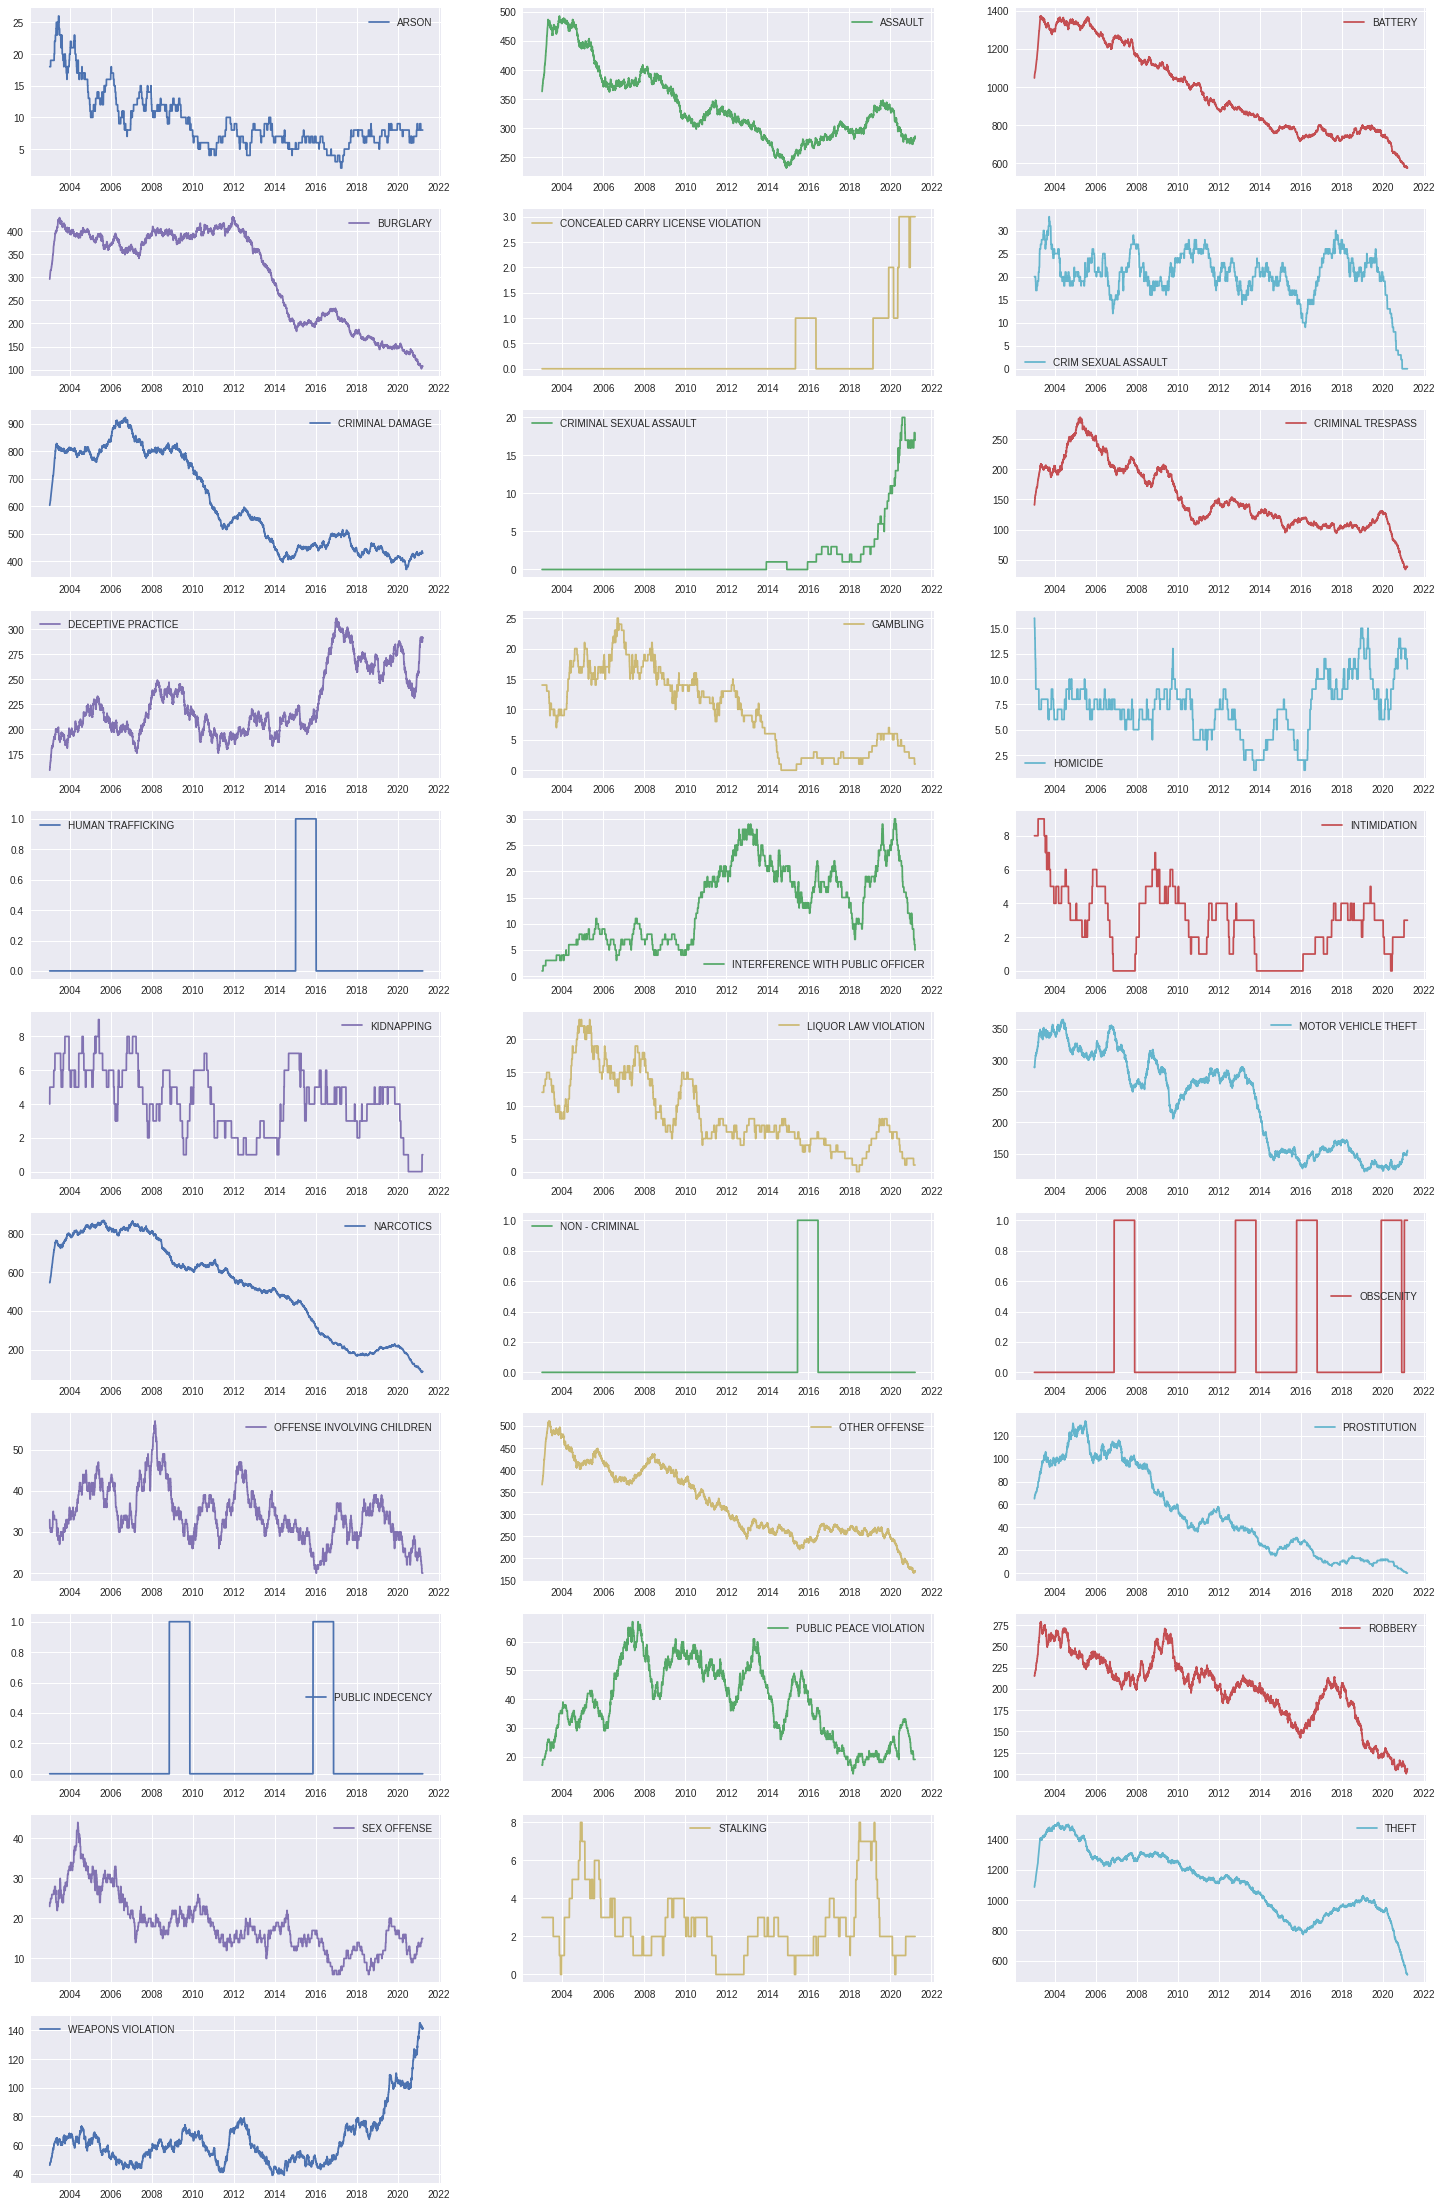

In [152]:
crimes_count_date.rolling(365).sum().plot(figsize=(25, 40), subplots=True, layout=(-1, 3), sharex=False, sharey=False)
plt.show()

### Drawing bargraph classifying crimes according to day of week¶


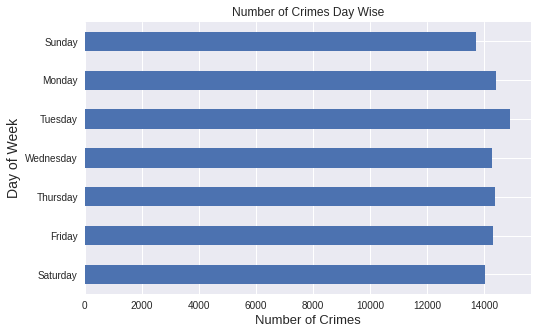

In [153]:
plt.figure(figsize = (8, 5))
day = ['Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday','Sunday']
df.groupby([df.index.dayofweek]).size().plot(kind = 'barh')
plt.title('Number of Crimes Day Wise')
plt.ylabel('Day of Week', fontsize = 14)
plt.yticks(np.arange(7), day)
plt.xlabel('Number of Crimes', fontsize = 13)
plt.show();

### Drawing bargraph classifying crimes according to month of year¶


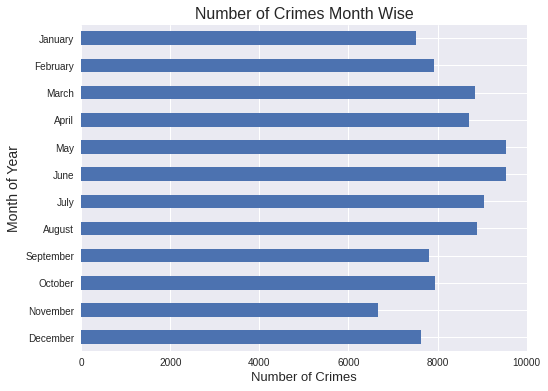

In [154]:
plt.figure(figsize = (8, 6))
day = ['December', 'November', 'October', 'September', 'August', 'July', 'June', 'May',  'April', 'March', 'February', 'January']
df.groupby([df.index.month]).size().plot(kind = 'barh')
plt.title('Number of Crimes Month Wise', fontsize = 16)
plt.ylabel('Month of Year', fontsize = 14)
plt.yticks(np.arange(12), day)
plt.xlabel('Number of Crimes', fontsize = 13)
plt.show();

### Drawing countplot showing different types of crimes in descending order¶


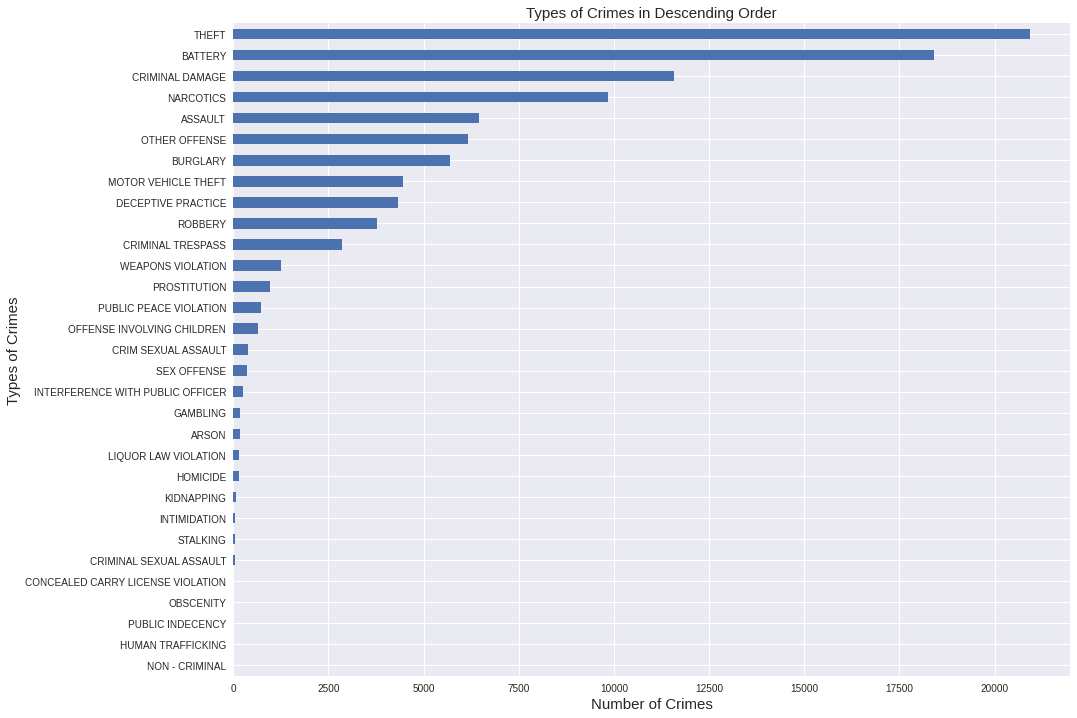

In [155]:
plt.figure(figsize = (15, 12))
df.groupby(df['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Types of Crimes in Descending Order', fontsize = 15)
plt.xlabel('Number of Crimes', fontsize = 15)
plt.ylabel('Types of Crimes', fontsize = 15)
plt.show()

### Drawing Countplot showing crime incident Location Description¶


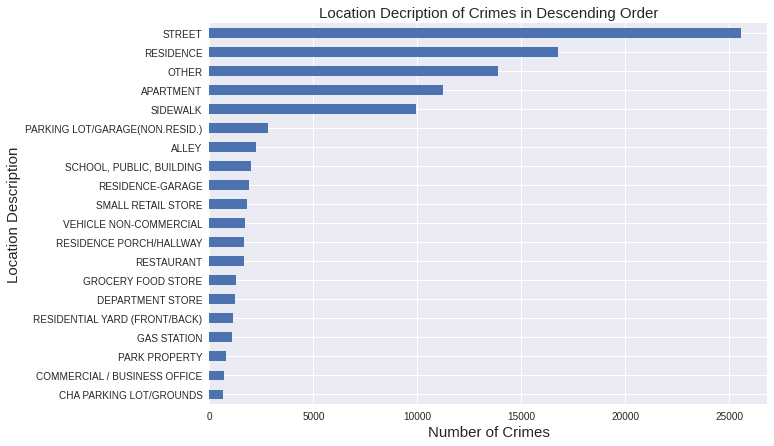

In [156]:
plt.figure(figsize = (10, 7))
df.groupby(df['Location Description']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Location Decription of Crimes in Descending Order', fontsize = 15)
plt.xlabel('Number of Crimes', fontsize = 15)
plt.ylabel('Location Description', fontsize = 15)
plt.show()

### Creating different pivot table of dataset for drawing heatmap¶


In [159]:
hour_by_location = df.pivot_table(values = 'ID', index = 'Location Description', columns = df.index.hour, aggfunc = np.size).fillna(0)
hour_by_type     = df.pivot_table(values = 'ID', index = 'Primary Type', columns = df.index.hour, aggfunc = np.size).fillna(0)
#hour_by_week     = df.pivot_table(values = 'ID', index = df.index.hour, columns = df.index.weekday_name, aggfunc = np.size).fillna(0)
#hour_by_week     = hour_by_week.T

day_by_location  = df.pivot_table(values = 'ID', index = 'Location Description', columns = df.index.dayofweek, aggfunc = np.size).fillna(0)
day_by_type      = df.pivot_table(values = 'ID', index = 'Primary Type', columns = df.index.dayofweek, aggfunc = np.size).fillna(0)
type_by_location = df.pivot_table(values = 'ID', index = 'Location Description', columns = 'Primary Type', aggfunc = np.size).fillna(0)

### Function for creating heatmap, doing clustering which makes them look nicer¶


In [160]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction = 0.03)
    plt.yticks(ix, df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, cmap = 'bwr', ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix, cmap = cmap)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [162]:
import seaborn as sns

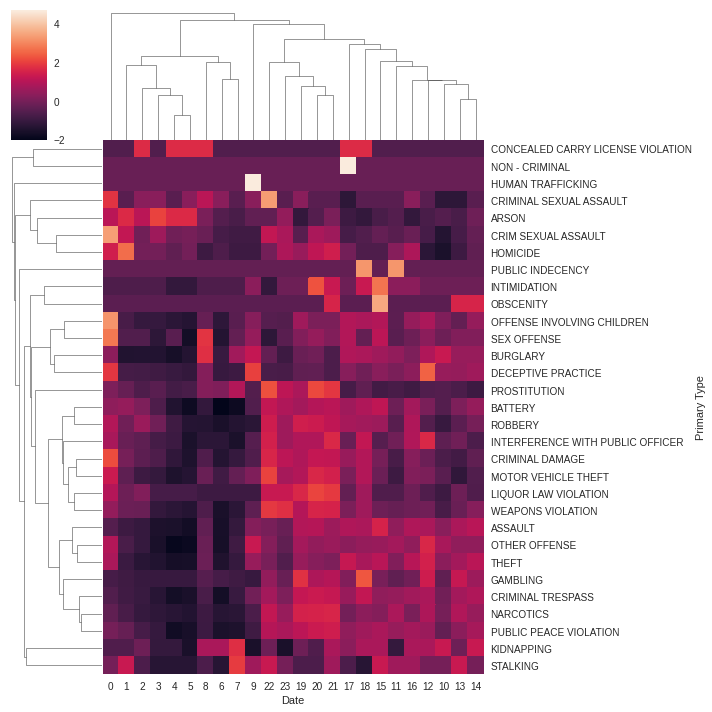

In [163]:
sns.clustermap(scale_df(hour_by_type.T).T)


### Heatmap showing intensity of different types of Crime according to hour of day¶


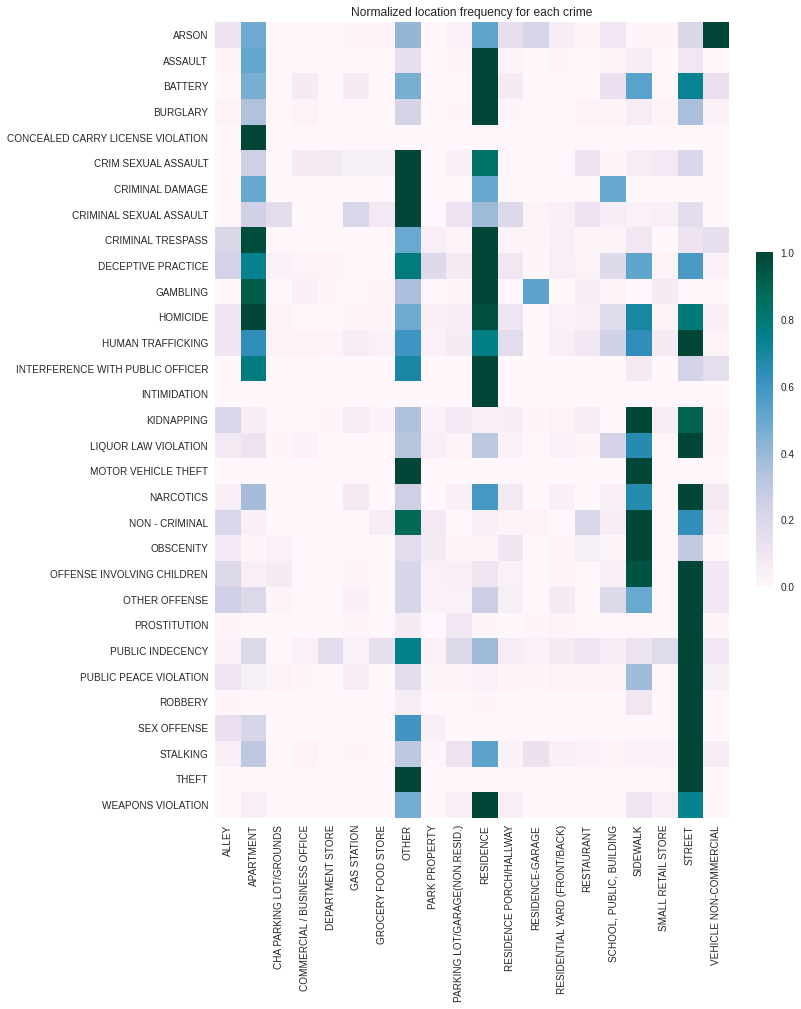

In [167]:
df = normalize(type_by_location)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(10, 15))
plt.imshow(df.T.iloc[ix,:], cmap='PuBuGn')#Reds
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

---



# Use PCA to combine features to 2 Features

In [175]:
from sklearn.decomposition import PCA

In [176]:
location = crimes[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)

In [177]:
loc = pca.fit_transform(location)

In [178]:
crimes['Location'] = loc

In [ ]:
crimes.head(1)

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Day,Month,Week,Block_direction,Location
0,11/15/2002 12:30:00 PM,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,False,1333,12.0,27.0,28.0,06,41.88843,-87.667064,2002-11-15,11,46,N,0.039373


#Feature selection + Clustering


In [ ]:
crimes.value_counts('Primary Type')

Primary Type
THEFT                                20938
BATTERY                              18417
CRIMINAL DAMAGE                      11573
NARCOTICS                             9845
ASSAULT                               6448
OTHER OFFENSE                         6172
BURGLARY                              5692
MOTOR VEHICLE THEFT                   4460
DECEPTIVE PRACTICE                    4322
ROBBERY                               3784
CRIMINAL TRESPASS                     2860
WEAPONS VIOLATION                     1245
PROSTITUTION                           974
PUBLIC PEACE VIOLATION                 721
OFFENSE INVOLVING CHILDREN             651
CRIM SEXUAL ASSAULT                    378
SEX OFFENSE                            356
INTERFERENCE WITH PUBLIC OFFICER       253
GAMBLING                               183
ARSON                                  182
LIQUOR LAW VIOLATION                   164
HOMICIDE                               147
KIDNAPPING                              7

In [ ]:
feature=crimes[['Beat','Ward', 'Location Description','Location','Arrest','Community Area','Block_direction','Primary Type']]

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

In [ ]:
feature.head(2)

,Beat,Ward,Location Description,Location,Arrest,Community Area,Block_direction,Primary Type
0,1333,27.0,STREET,0.039373,False,28.0,N,THEFT
1,1222,25.0,SIDEWALK,0.012297,False,31.0,W,BATTERY


In [ ]:
list_label=['Beat','Ward', 'Location Description','Location','Arrest','Community Area','Block_direction','Primary Type']

In [ ]:
le = LabelEncoder()

for feat in list_label:
    feature[feat] = le.fit_transform(feature[feat].astype(str))

print (feature.info())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Beat                  100000 non-null  int64
 1   Ward                  100000 non-null  int64
 2   Location Description  100000 non-null  int64
 3   Location              100000 non-null  int64
 4   Arrest                100000 non-null  int64
 5   Community Area        100000 non-null  int64
 6   Block_direction       100000 non-null  int64
 7   Primary Type          100000 non-null  int64
dtypes: int64(8)
memory usage: 6.1 MB
None


In [ ]:
X = feature.loc[:, feature.columns != 'Primary Type']

model.fit(X,feature['Primary Type'])

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.08967897 0.03480822 0.18297683 0.59459382 0.04877128 0.03285804
 0.01631284]


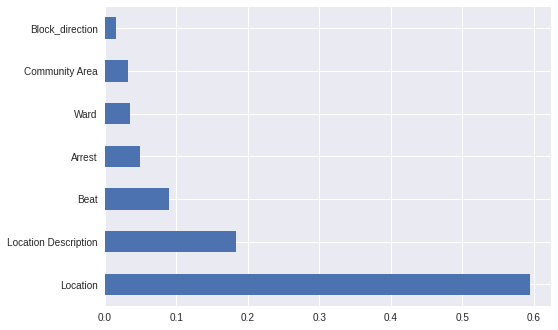

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#plot for top 10 features
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# As we can see that location is a most important feature in the all features

In [ ]:
corelation = feature.corr()
corelation

,Beat,Ward,Location Description,Location,Arrest,Community Area,Block_direction,Primary Type
Beat,1.000000,-0.015423,0.002623,-0.566630,-0.044640,0.565026,-0.040887,-0.071930
Ward,-0.015423,1.000000,-0.048480,0.351647,-0.039274,-0.127148,-0.266824,0.024032
Location Description,0.002623,-0.048480,1.000000,0.001892,0.036966,-0.013398,0.017403,0.120723
Location,-0.566630,0.351647,0.001892,1.000000,-0.001487,-0.598202,-0.043739,0.050300
Arrest,-0.044640,-0.039274,0.036966,-0.001487,1.000000,-0.039528,0.024506,0.047506
Community Area,0.565026,-0.127148,-0.013398,-0.598202,-0.039528,1.000000,0.005479,-0.009201
Block_direction,-0.040887,-0.266824,0.017403,-0.043739,0.024506,0.005479,1.000000,-0.019211
Primary Type,-0.071930,0.024032,0.120723,0.050300,0.047506,-0.009201,-0.019211,1.000000


In [ ]:
import seaborn as sns

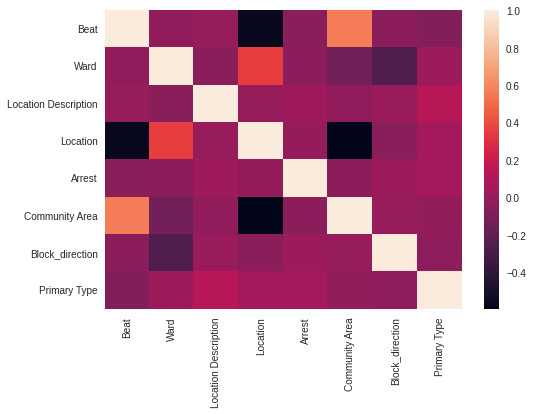

In [ ]:
sns.heatmap(corelation)


In [ ]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=2, random_state=1).fit(feature[['Beat','Ward', 'Location Description','Location','Block_direction','Community Area','Arrest']])
feature['Cluster'] = kms.labels_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Predict the chances of arrest

In [ ]:
feature['predict_arrest']=feature['Cluster']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
feature.head()

,Beat,Ward,Location Description,Location,Arrest,Community Area,Block_direction,Primary Type,Cluster,predict_arrest
0,61,19,131,41646,0,20,1,29,1,1
1,39,17,127,35278,0,24,3,2,1,1
2,25,16,131,46075,1,17,2,23,1,1
3,219,44,94,20212,0,65,2,2,0,0
4,196,34,17,66129,0,74,3,6,1,1


### Kmeans for selected features

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
X=feature[['Beat','Ward','Location Description','Location','Arrest','Community Area','predict_arrest','Block_direction']]
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,25):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,25),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

# One-hot encoding

In [ ]:
crimes.head(1)

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Day,Month,Week,Block_direction,Location
0,11/15/2002 12:30:00 PM,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,False,1333,12.0,27.0,28.0,06,41.88843,-87.667064,2002-11-15,11,46,N,0.039373


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc_df = pd.DataFrame(enc.fit_transform(crimes[['Community Area','FBI Code','Arrest','Domestic','Description','Block_direction']]).toarray())

In [ ]:
enc_df.shape

(100000, 488)

# Label Encoding

In [ ]:
list_label=['IUCR','Beat','Community Area','District','Ward']

In [ ]:
le = LabelEncoder()

for feat in list_label:
    enc_df[feat] = le.fit_transform(crimes[feat].astype(str))

print (enc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 493 entries, 0 to Ward
dtypes: float64(488), int64(5)
memory usage: 376.1 MB
None


In [ ]:
enc_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,483,484,485,486,487,IUCR,Beat,Community Area,District,Ward
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,74,61,20,3,19


In [ ]:
np.count_nonzero(enc_df.isnull())

0

# PCA for 2 features

In [ ]:
pca = PCA(n_components=2,random_state=123)

In [ ]:
loc = pca.fit_transform(enc_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
loc.shape

(100000, 2)

In [ ]:
np.count_nonzero(enc_df.isnull())

0

# Kmeans

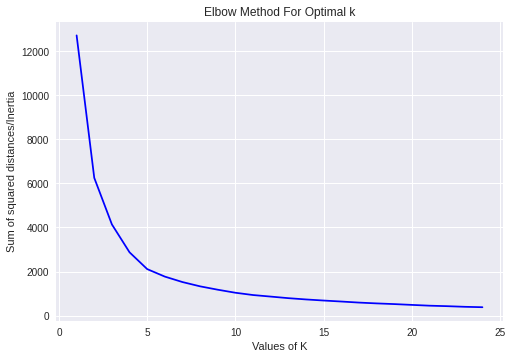

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
X=loc
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,25):
  kmeans = KMeans(n_clusters=i, init="k-means++",n_init=10,tol=1e-04, random_state=42)
  kmeans.fit(X)
  predictions= kmeans.predict(X)
  inertia.append(kmeans.inertia_)
plt.plot(range(1,25),inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

In [ ]:
predictions

array([ 1,  9,  7, ..., 19,  9, 18], dtype=int32)

In [ ]:
normalized_mutual_info_score(crimes['Primary Type'], predictions)

0.49010118544714876

###Cluster based on primary type given

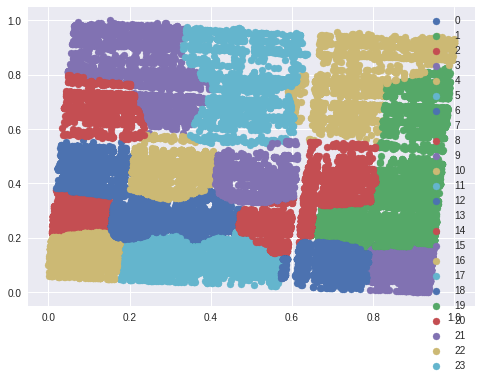

In [ ]:
#Getting unique labels
 
u_labels = np.unique(predictions)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[predictions == i , 0] , X[predictions == i , 1] , label = i)
plt.legend()
plt.show()


# Best Cluster with 4 value

In [ ]:
for i in 4:
    plt.scatter(X[predictions == i , 0] , X[predictions == i , 1] , label = i)
plt.legend()
plt.show()


# Silhoute Curve for kmeans

In [ ]:
from sklearn.metrics import silhouette_score


In [ ]:
cluster_labels=[]
for i in range(2,10):
  cluster_labels.append(i)

In [ ]:
silhouette_avg = []
for num_clusters in cluster_labels:
# initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(loc)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(loc, cluster_labels))
silhouette_avg

[0.4062146115881652,
 0.5969732708311737,
 0.6969732708311737,
 0.7334351232424423,
 0.5252342134235544,
 0.4732453465356452,
 0.4356436364576434,
 0.4352543452367651]

### 4th cluster as maximum silhouette value

# Birch

In [ ]:
import sklearn

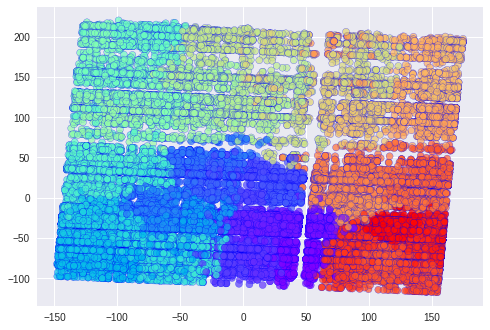

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
  

# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
  
# Fit the data (Training)
model.fit(loc)
  
# Predict the same data
pred = model.predict(loc)
  
# Creating a scatter plot
plt.scatter(loc[:, 0], loc[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

In [ ]:
normalized_mutual_info_score(crimes['Primary Type'], pred)

0.4570064192073997

# MINI-Batch Kmeans

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

  
# Load data in X 
batch_size = 45
n_clusters = 4
  
# perform the mini batch K-means
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 4,
                      batch_size = batch_size, n_init = 10,
                      max_no_improvement = 10, verbose = 0)
  
mbk.fit(X)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
  
# print the labels of each data
print(mbk_means_labels)

[2 2 2 ... 2 2 1]


In [ ]:
normalized_mutual_info_score(crimes['Primary Type'], mbk_means_labels)

0.10566726472216484

# Auto encoder + kmeans

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [ ]:
input_df = Input( shape = (enc_df.shape[1], ))

x = Dense(7, activation = 'relu')(input_df)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(493, kernel_initializer='glorot_uniform')(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(enc_df, enc_df, batch_size= 120, epochs = 5, verbose = 1)

Epoch 1/5
834/834 [==============================] - 60s 70ms/step - loss: 2.2542
Epoch 2/5
834/834 [==============================] - 52s 63ms/step - loss: 0.0477
Epoch 3/5
834/834 [==============================] - 49s 58ms/step - loss: 0.0567
Epoch 4/5
834/834 [==============================] - 47s 57ms/step - loss: 0.0423
Epoch 5/5
834/834 [==============================] - 47s 56ms/step - loss: 0.1257


In [ ]:
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 493)]             0         
                                                                 
 dense (Dense)               (None, 7)                 3458      
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [ ]:
pred_auto = encoder.predict(enc_df)


In [ ]:
pred_auto.shape


(100000, 10)

In [ ]:
 score_2 = []
range_values = range(1, 25)
for i in range(1,25):
  kmeans = KMeans(n_clusters=i, init="k-means++",n_init=10,tol=1e-04, random_state=42)
  kmeans.fit(pred_auto)
  predictions= kmeans.predict(pred_auto)
  score_2.append(kmeans.inertia_)

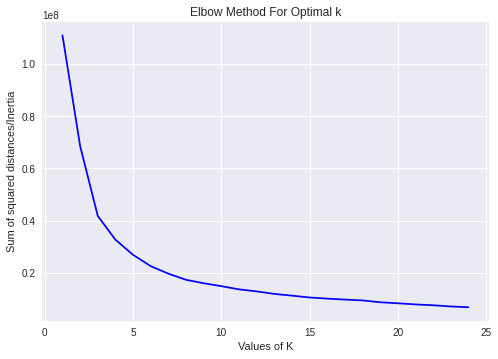

In [ ]:
plt.plot(range(1,25),score_2,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show() 

In [ ]:
pred_auto.shape

(100000, 10)

In [ ]:
normalized_mutual_info_score(crimes['Primary Type'], predictions)

0.4540668861604388

# Gaussian Mixture model

In [ ]:
from sklearn.mixture import GaussianMixture
for i in range(1,25):
  gmm = GaussianMixture(n_components=i)
  gmm.fit(loc)
  labels = gmm.predict(loc)

In [ ]:
labels

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
np.count_nonzero(labels == 0)

17918

In [ ]:
normalized_mutual_info_score(crimes['Primary Type'], labels)

0.25032881777243277

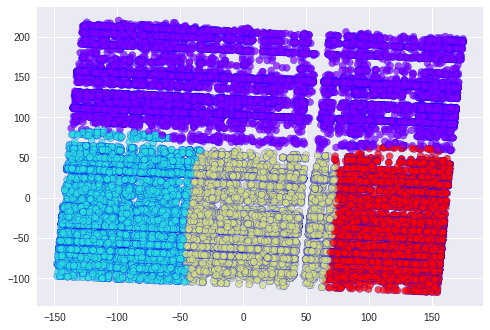

In [ ]:
plt.scatter(loc[:, 0], loc[:, 1], c = labels, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

# Hence best model base on NMI is Kmeans

In [ ]:
k = 4
kmeans_4= KMeans(n_clusters=4)
kmeans_4.fit(X)
crimes['labels'] = kmeans_4.predict(X)

In [ ]:
crimes[crimes['labels']==0].head(3)

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Community Area,FBI Code,Latitude,Longitude,Day,Month,Week,Block_direction,Location,labels
3,08/04/2012 05:15:00 PM,072XX S INGLESIDE AVE,0460,BATTERY,SIMPLE,OTHER,False,False,324,3.0,...,69.0,08B,41.763932,-87.601884,2012-08-04,8,31,S,-0.101152,0
4,12/16/2019 04:45:00 PM,017XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2433,24.0,...,77.0,14,41.995575,-87.674309,2019-12-16,12,51,W,0.137934,0
5,10/24/2016 12:30:00 PM,096XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False,511,5.0,...,49.0,08B,41.719023,-87.620529,2016-10-24,10,43,S,-0.132531,0


In [ ]:
crimes[crimes['labels']==0].describe()

,Beat,District,Ward,Community Area,Latitude,Longitude,Month,Week,Location,labels
count,44910.000000,44910.000000,44910.000000,44910.000000,44910.000000,44910.000000,44910.000000,44910.000000,44910.000000,44910.0
mean,1052.376687,10.050345,18.457649,49.372367,41.793720,-87.652602,6.636762,27.151191,-0.051439,0.0
std,799.369379,7.840228,12.386926,20.043701,0.084186,0.057291,3.313523,14.473902,0.091171,0.0
min,213.000000,2.000000,1.000000,1.000000,41.644608,-87.815763,1.000000,1.000000,-0.235340,0.0
25%,511.000000,4.000000,8.000000,42.000000,41.744934,-87.686403,4.000000,15.000000,-0.116028,0.0
50%,726.000000,7.000000,16.000000,52.000000,41.773220,-87.648925,7.000000,27.000000,-0.071478,0.0
75%,935.000000,9.000000,23.000000,67.000000,41.809488,-87.614050,9.000000,39.000000,-0.019713,0.0
max,2535.000000,25.000000,50.000000,77.000000,42.022536,-87.524529,12.000000,53.000000,0.173172,0.0


In [ ]:
crimes[crimes['labels']==1].describe()

,Beat,District,Ward,Community Area,Latitude,Longitude,Month,Week,Location,labels
count,36042.000000,36042.000000,36042.000000,36042.000000,36042.000000,36042.000000,36042.000000,36042.000000,36042.000000,36042.0
mean,1359.892376,12.922979,28.240358,22.650075,41.902944,-87.691066,6.673409,27.286527,0.063270,1.0
std,531.935400,5.428137,14.263850,13.212546,0.041465,0.052656,3.312966,14.467957,0.050285,0.0
min,111.000000,1.000000,1.000000,2.000000,41.796218,-87.925509,1.000000,1.000000,-0.075800,1.0
25%,1122.000000,11.000000,24.000000,13.000000,41.876060,-87.723777,4.000000,15.000000,0.028074,1.0
50%,1432.000000,14.000000,29.000000,24.000000,41.894950,-87.688454,7.000000,28.000000,0.059110,1.0
75%,1811.000000,17.000000,41.000000,29.000000,41.934812,-87.648268,9.000000,39.000000,0.089282,1.0
max,2131.000000,31.000000,50.000000,77.000000,42.017968,-87.589217,12.000000,53.000000,0.250296,1.0


In [ ]:
crimes[crimes['labels']==2].describe()

,Beat,District,Ward,Community Area,Latitude,Longitude,Month,Week,Location,labels
count,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000,8319.0
mean,1304.364106,12.779180,26.998678,24.037144,41.894305,-87.716342,6.425532,26.175502,0.067170,2.0
std,364.343994,3.636649,11.041284,9.276000,0.033940,0.044160,3.385144,14.782700,0.039868,0.0
min,111.000000,1.000000,1.000000,2.000000,41.830735,-87.910457,1.000000,1.000000,-0.026537,2.0
25%,1114.000000,11.000000,24.000000,23.000000,41.873849,-87.745133,4.000000,13.000000,0.041214,2.0
50%,1225.000000,12.000000,28.000000,25.000000,41.884476,-87.717891,6.000000,26.000000,0.064002,2.0
75%,1532.000000,15.000000,33.000000,28.000000,41.902261,-87.695459,9.000000,39.000000,0.080693,2.0
max,2024.000000,20.000000,50.000000,76.000000,42.017817,-87.613060,12.000000,53.000000,0.232460,2.0


In [ ]:
crimes[crimes['labels']==3].describe()

,Beat,District,Ward,Community Area,Latitude,Longitude,Month,Week,Location,labels
count,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.0
mean,1051.190046,9.829900,18.197036,49.116600,41.796722,-87.651429,6.496878,26.450648,-0.049308,3.0
std,806.242391,7.883665,12.353917,19.772054,0.081616,0.055158,3.371124,14.709111,0.088477,0.0
min,211.000000,1.000000,2.000000,1.000000,41.645818,-87.813983,1.000000,1.000000,-0.235340,3.0
25%,433.000000,4.000000,8.000000,40.000000,41.749704,-87.683327,4.000000,14.000000,-0.111988,3.0
50%,725.000000,7.000000,16.000000,50.000000,41.778099,-87.648871,7.000000,27.000000,-0.065624,3.0
75%,2031.000000,9.000000,23.000000,67.000000,41.814775,-87.614953,9.000000,39.000000,-0.022005,3.0
max,2535.000000,31.000000,50.000000,77.000000,42.022535,-87.525258,12.000000,53.000000,0.165906,3.0
